# Statistical analysis of individual GMAC thresholds

In [31]:
from functions.statistics import *
from functions.regression import *
from utilities import *

In [32]:
initial_path = '../data/CreateStudy'
s_json_files = get_json_paths(initial_path, 'S')

Extract demographic information and individual GMAC thresholds from grid search without 5-folds

In [33]:
result = extract_fields_from_json_files(s_json_files, ['ARAT_score', 'FMA-UE_score', 'participant_id', 'dominant_arm_affected', 'individual_GMAC_thresholds_affected_side', 'individual_GMAC_thresholds_unaffected_side'])

In [34]:
PATIENT_ID = result['participant_id']
ARAT = result['ARAT_score']
FMA_UE = result['FMA-UE_score']
DOMINANT_IMPAIRED = result["dominant_arm_affected"]

# affected side
individual_thresholds = result['individual_GMAC_thresholds_affected_side']
COUNT_THRESHOLD = individual_thresholds[:,0]
PITCH_THRESHOLD = individual_thresholds[:,1]
# unaffected side
optimal_thresholds = result['individual_GMAC_thresholds_unaffected_side']
COUNT_THRESHOLD_HEALTHY = optimal_thresholds[:,0]
PITCH_THRESHOLD_HEALTHY = optimal_thresholds[:,1]

### Distribution of individual thresholds

Mean count threshold Affected side: 1.7, Mean count threshold Unaffected side: 5.3
Standard deviation count threshold Affected side: 2.2825424421026654, Standard deviation count threshold Unaffected side: 4.859012245302536
Wilcoxon Signed-Rank Test Count:
p-value: 0.07540356287126336
Paired Samples T-Test Count:
p-value: 0.06928586017888372
Mean elevation threshold Affected side: 42.9, Mean elevation threshold Unaffected side: 56.2
Standard deviation elevation threshold Affected side: 9.761659694949419, Standard deviation elevation threshold Unaffected side: 7.467261881037788
Wilcoxon Signed-Rank Test Elevation:
p-value: 0.037109375
Paired Samples T-Test Elevation:
p-value: 0.02484634444065553


/Users/linus/Code/imu_processing/.venv/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  res = hypotest_fun_out(*samples, **kwds)
/Users/linus/Code/imu_processing/.venv/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: Sample size too small for normal approximation.
  res = hypotest_fun_out(*samples, **kwds)


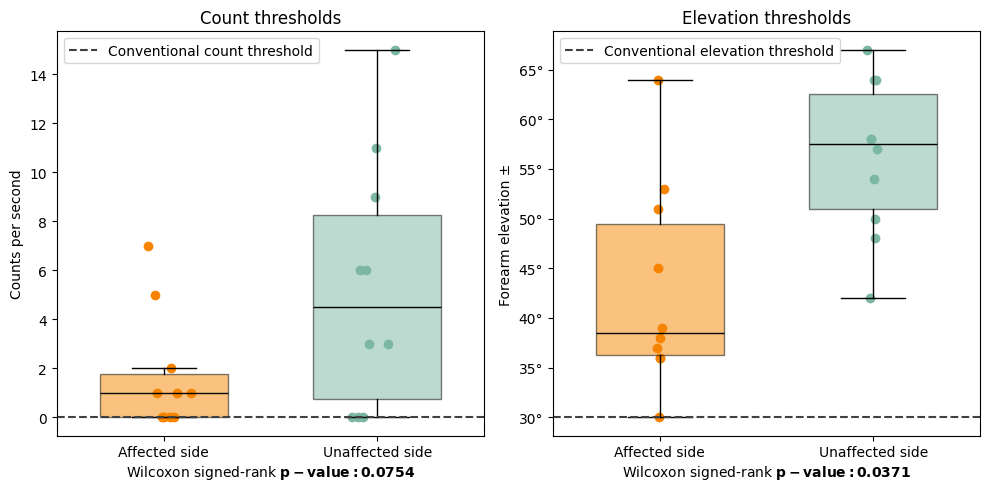

In [35]:
check_distribution(COUNT_THRESHOLD, COUNT_THRESHOLD_HEALTHY, PITCH_THRESHOLD, PITCH_THRESHOLD_HEALTHY)

### Regression models of threshold FMA-UE dependence

affected count

In [36]:
check_regression_paper(FMA_UE, COUNT_THRESHOLD, x_label='FMA-UE', y_label='Counts per second', title='Individual count thresholds', dominant_impared=DOMINANT_IMPAIRED)

Linear model coefficients: [-0.03747963]
Linear model intercept: 3.244160782183596
Linear model R-squared: 0.07941940925454638
Linear model adjusted R-squared: -0.03565316458863532
Polynomial model coefficients (degree 2): [ 0.          0.02718361 -0.00078922]
Polynomial model intercept (degree 2): 2.1521624397801857
Polynomial model R-squared (degree 2): 0.08530585723467898
Polynomial model adjusted R-squared (degree 2): -0.02903091061098606
Pearson Correlation: -0.2818144944010979 p-value: 0.4302015229464943
Spearman Correlation: -0.46388727820555314 p-value: 0.17686304082820462


affected elevation

In [37]:
check_regression_paper(FMA_UE, PITCH_THRESHOLD, x_label='FMA-UE', y_label='Elevation', title='Individual elevation thresholds', dominant_impared=DOMINANT_IMPAIRED)

Linear model coefficients: [0.00380228]
Linear model intercept: 42.74334600760456
Linear model R-squared: 4.469047258970349e-05
Linear model adjusted R-squared: -0.12494972321833653
Polynomial model coefficients (degree 2): [ 0.         -3.38491456  0.04135958]
Polynomial model intercept (degree 2): 99.97019171464444
Polynomial model R-squared (degree 2): 0.8839370214275383
Polynomial model adjusted R-squared (degree 2): 0.8694291491059806
Pearson Correlation: 0.00668509331197238 p-value: 0.9853770118999915
Spearman Correlation: 0.1402439024390244 p-value: 0.699179517071646


unaffected count

In [38]:
check_regression_paper(FMA_UE, COUNT_THRESHOLD_HEALTHY, x_label='FMA-UE', y_label='Counts per second', title='Individual count thresholds unaffected side', dominant_impared=DOMINANT_IMPAIRED)

Linear model coefficients: [-0.12954916]
Linear model intercept: 10.637425312330254
Linear model R-squared: 0.20938567860265977
Linear model adjusted R-squared: 0.11055888842799222
Polynomial model coefficients (degree 2): [ 0.          0.78473422 -0.01115891]
Polynomial model intercept (degree 2): -4.8025055640750365
Polynomial model R-squared (degree 2): 0.46906764538462764
Polynomial model adjusted R-squared (degree 2): 0.40270110105770607
Pearson Correlation: -0.45758679898207283 p-value: 0.1835996286086209
Spearman Correlation: -0.5511496303343048 p-value: 0.09867079496507818


unaffected elevation

In [39]:
check_regression_paper(FMA_UE, PITCH_THRESHOLD_HEALTHY, x_label='FMA-UE', y_label='Elevation', title='Individual elevation thresholds unaffected side', dominant_impared=DOMINANT_IMPAIRED)

Linear model coefficients: [-0.105717]
Linear model intercept: 60.555540467137426
Linear model R-squared: 0.059039229389242776
Linear model adjusted R-squared: -0.05858086693710196
Polynomial model coefficients (degree 2): [ 0.          1.38410923 -0.01818346]
Polynomial model intercept (degree 2): 35.39614836602849
Polynomial model R-squared (degree 2): 0.3510000646184249
Polynomial model adjusted R-squared (degree 2): 0.2698750726957281
Pearson Correlation: -0.2429798950309315 p-value: 0.49876594294061477
Spearman Correlation: -0.15596403204180667 p-value: 0.6670071768641199
